In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input,train_target), (test_input,test_target)= keras.datasets.fashion_mnist.load_data()

In [13]:
train_scaled=train_input/255.0
train_scaled,val_scaled,train_target,val_target=train_test_split(train_scaled,train_target,test_size=0.2,random_state=42)

In [18]:
def model_fn(a_layer=None):
    model=keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100,activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10,activation='softmax'))
    return model

In [19]:
model=model_fn()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=5,verbose=1)

Train on 48000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 46us/sample - loss: 0.2459 - acc: 0.9157
Epoch 2/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.2399 - acc: 0.9175
Epoch 3/5
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2350 - acc: 0.9181
Epoch 4/5
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2295 - acc: 0.9210
Epoch 5/5
48000/48000 [==============================] - 2s 44us/sample - loss: 0.2254 - acc: 0.9240


In [31]:
print(history.history.keys()) # 모델훈련한 데이터

dict_keys(['loss', 'acc'])


In [25]:
print(history.history)# epoch당 loss, accuarcy

{'loss': [0.24587494248275957, 0.2399227547397216, 0.23495897609523186, 0.22950875219578545, 0.22537013650437196], 'acc': [0.91570836, 0.9175417, 0.9180625, 0.9210208, 0.92397916]}


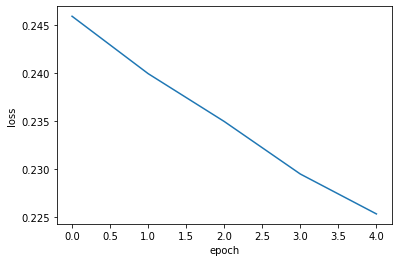

In [26]:
import matplotlib.pyplot as plt# 손실함수 그래프로 시각화
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

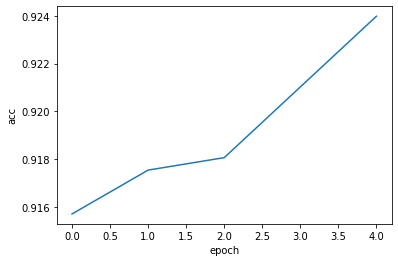

In [34]:
plt.plot(history.history['acc']) # epoch당 정확도 그래프 시각화
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [35]:
# epoch 늘리기
model=model_fn()
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=1)

Train on 48000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 48us/sample - loss: 0.5332 - acc: 0.8130
Epoch 2/20
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3906 - acc: 0.8597
Epoch 3/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.3548 - acc: 0.8725
Epoch 4/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.3328 - acc: 0.8802
Epoch 5/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.3200 - acc: 0.8865
Epoch 6/20
48000/48000 [==============================] - 2s 44us/sample - loss: 0.3082 - acc: 0.8898
Epoch 7/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2971 - acc: 0.8951
Epoch 8/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2898 - acc: 0.8979
Epoch 9/20
48000/48000 [==============================] - 2s 45us/sample - loss: 0.2823 - acc: 0.9004
Epoch 10/20
48000/48000 [==============================] - 

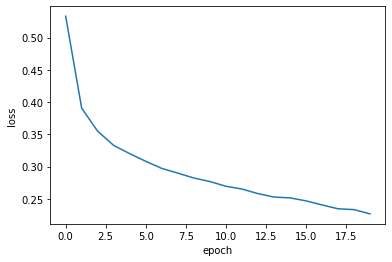

In [37]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

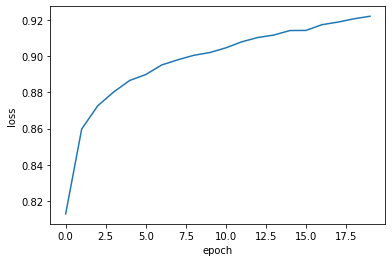

In [38]:
plt.plot(history.history['acc'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [39]:
#모델이 잘 훈련됬는지 확인할려면 loss함수에 의해 확인 가능
model=model_fn() #검증 세트로 평가
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target, epochs=20,verbose=2,validation_data=(val_scaled,val_target))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20


c:\users\drepi\anaconda3\envs\rhs\lib\site-packages\tensorflow\python\keras\engine\training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


48000/48000 - 2s - loss: 0.5310 - acc: 0.8135 - val_loss: 0.4260 - val_acc: 0.8460
Epoch 2/20
48000/48000 - 2s - loss: 0.3908 - acc: 0.8588 - val_loss: 0.3818 - val_acc: 0.8636
Epoch 3/20
48000/48000 - 2s - loss: 0.3532 - acc: 0.8735 - val_loss: 0.4111 - val_acc: 0.8600
Epoch 4/20
48000/48000 - 2s - loss: 0.3319 - acc: 0.8816 - val_loss: 0.3527 - val_acc: 0.8777
Epoch 5/20
48000/48000 - 2s - loss: 0.3175 - acc: 0.8857 - val_loss: 0.4130 - val_acc: 0.8587
Epoch 6/20
48000/48000 - 2s - loss: 0.3061 - acc: 0.8905 - val_loss: 0.3616 - val_acc: 0.8776
Epoch 7/20
48000/48000 - 2s - loss: 0.2958 - acc: 0.8953 - val_loss: 0.3820 - val_acc: 0.8730
Epoch 8/20
48000/48000 - 2s - loss: 0.2882 - acc: 0.8972 - val_loss: 0.3908 - val_acc: 0.8759
Epoch 9/20
48000/48000 - 2s - loss: 0.2814 - acc: 0.9007 - val_loss: 0.3855 - val_acc: 0.8725
Epoch 10/20
48000/48000 - 2s - loss: 0.2751 - acc: 0.9040 - val_loss: 0.3953 - val_acc: 0.8759
Epoch 11/20
48000/48000 - 2s - loss: 0.2682 - acc: 0.9059 - val_loss: 

In [40]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


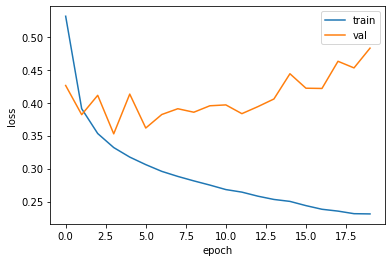

In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [49]:
#과대적합을 막는 규제방법은 옵티마이저 사용
model=model_fn() #검증 세트로 평가
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target, epochs=20,verbose=2,validation_data=(val_scaled,val_target))
# 더 나음을 위해서는 learning rate를 조정해볼 필요가 있다

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 2s - loss: 0.5235 - acc: 0.8186 - val_loss: 0.4158 - val_acc: 0.8528
Epoch 2/20
48000/48000 - 2s - loss: 0.3932 - acc: 0.8586 - val_loss: 0.3759 - val_acc: 0.8669
Epoch 3/20
48000/48000 - 2s - loss: 0.3508 - acc: 0.8727 - val_loss: 0.3427 - val_acc: 0.8763
Epoch 4/20
48000/48000 - 2s - loss: 0.3245 - acc: 0.8821 - val_loss: 0.3465 - val_acc: 0.8748
Epoch 5/20
48000/48000 - 2s - loss: 0.3055 - acc: 0.8890 - val_loss: 0.3348 - val_acc: 0.8818
Epoch 6/20
48000/48000 - 2s - loss: 0.2923 - acc: 0.8921 - val_loss: 0.3306 - val_acc: 0.8806
Epoch 7/20
48000/48000 - 2s - loss: 0.2778 - acc: 0.8970 - val_loss: 0.3292 - val_acc: 0.8827
Epoch 8/20
48000/48000 - 2s - loss: 0.2668 - acc: 0.9007 - val_loss: 0.3302 - val_acc: 0.8830
Epoch 9/20
48000/48000 - 2s - loss: 0.2563 - acc: 0.9047 - val_loss: 0.3259 - val_acc: 0.8837
Epoch 10/20
48000/48000 - 2s - loss: 0.2483 - acc: 0.9073 - val_loss: 0.3249 - val_acc: 0.8850
Epoch 11/

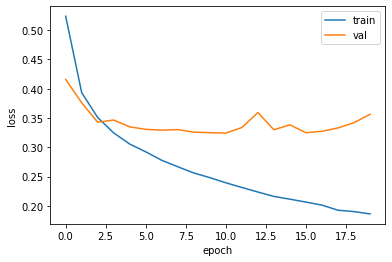

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [51]:
model.evaluate(val_scaled,val_target)

[0.35624053290486335, 0.88266665]

In [45]:
#과대적합을 막는 규제방법은 옵티마이저 사용
model=model_fn() #검증 세트로 평가
adam=keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target, epochs=20,verbose=2,validation_data=(val_scaled,val_target))
# 더 나음을 위해서는 learning rate를 조정해볼 필요가 있다

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 2s - loss: 1.5853 - acc: 0.5226 - val_loss: 1.1427 - val_acc: 0.6791
Epoch 2/20
48000/48000 - 2s - loss: 0.9736 - acc: 0.7108 - val_loss: 0.8746 - val_acc: 0.7282
Epoch 3/20
48000/48000 - 2s - loss: 0.7981 - acc: 0.7539 - val_loss: 0.7592 - val_acc: 0.7574
Epoch 4/20
48000/48000 - 2s - loss: 0.7119 - acc: 0.7759 - val_loss: 0.6961 - val_acc: 0.7740
Epoch 5/20
48000/48000 - 2s - loss: 0.6601 - acc: 0.7900 - val_loss: 0.6545 - val_acc: 0.7864
Epoch 6/20
48000/48000 - 2s - loss: 0.6239 - acc: 0.8006 - val_loss: 0.6230 - val_acc: 0.7958
Epoch 7/20
48000/48000 - 2s - loss: 0.5966 - acc: 0.8074 - val_loss: 0.5988 - val_acc: 0.8053
Epoch 8/20
48000/48000 - 2s - loss: 0.5750 - acc: 0.8139 - val_loss: 0.5798 - val_acc: 0.8091
Epoch 9/20
48000/48000 - 2s - loss: 0.5579 - acc: 0.8185 - val_loss: 0.5648 - val_acc: 0.8141
Epoch 10/20
48000/48000 - 2s - loss: 0.5437 - acc: 0.8224 - val_loss: 0.5515 - val_acc: 0.8185
Epoch 11/

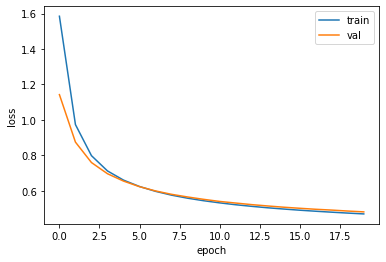

In [47]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [48]:
model.evaluate(val_scaled,val_target)

[0.48066325958569844, 0.83608335]

In [52]:
# 드롭아웃
model=model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [56]:
#검증
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 72us/sample - loss: 0.2305 - acc: 0.9126 - val_loss: 0.3490 - val_acc: 0.8913
Epoch 2/20
48000/48000 [==============================] - 4s 76us/sample - loss: 0.2250 - acc: 0.9133 - val_loss: 0.3546 - val_acc: 0.8881
Epoch 3/20
48000/48000 [==============================] - 4s 79us/sample - loss: 0.2251 - acc: 0.9141 - val_loss: 0.3392 - val_acc: 0.8900
Epoch 4/20
48000/48000 [==============================] - 3s 60us/sample - loss: 0.2229 - acc: 0.9129 - val_loss: 0.3599 - val_acc: 0.8883 1s - 
Epoch 5/20
48000/48000 [==============================] - 3s 71us/sample - loss: 0.2238 - acc: 0.9143 - val_loss: 0.3433 - val_acc: 0.8920
Epoch 6/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.2207 - acc: 0.9149 - val_loss: 0.3543 - val_acc: 0.8898- ETA: 0s - loss: 0.2203 - a
Epoch 7/20
48000/48000 [==============================] - 3s 63us/sample - loss: 0

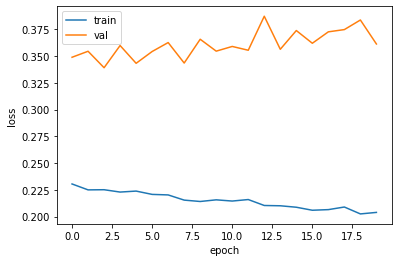

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [59]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 67us/sample - loss: 0.5872 - acc: 0.7933 - val_loss: 0.4300 - val_acc: 0.8429
Epoch 2/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.4358 - acc: 0.8423 - val_loss: 0.3955 - val_acc: 0.8547
Epoch 3/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.4048 - acc: 0.8528 - val_loss: 0.3737 - val_acc: 0.8605
Epoch 4/20
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3838 - acc: 0.8596 - val_loss: 0.3529 - val_acc: 0.8688
Epoch 5/20
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3666 - acc: 0.8665 - val_loss: 0.3493 - val_acc: 0.8733
Epoch 6/20
48000/48000 [==============================] - 3s 59us/sample - loss: 0.3555 - acc: 0.8693 - val_loss: 0.3413 - val_acc: 0.8750
Epoch 7/20
48000/48000 [==============================] - 3s 59us/sample - loss: 0.3438 - acc: 0.8749 - val_loss: 0.

In [60]:
model.save_weights('model-weights.h5')

In [61]:
model.save('model-whole.h5')

In [67]:
model=model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [68]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [69]:
import numpy as np
val_labels=np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels==val_target))

0.8835


In [70]:
model=keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled,val_target)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


[0.34195083808898924, 0.8835]

In [71]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 68us/sample - loss: 0.5844 - acc: 0.7916 - val_loss: 0.4112 - val_acc: 0.8530
Epoch 2/20
48000/48000 [==============================] - 3s 59us/sample - loss: 0.4361 - acc: 0.8424 - val_loss: 0.4103 - val_acc: 0.8522
Epoch 3/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3993 - acc: 0.8550 - val_loss: 0.3593 - val_acc: 0.8682
Epoch 4/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3792 - acc: 0.8607 - val_loss: 0.3591 - val_acc: 0.8702
Epoch 5/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3622 - acc: 0.8665 - val_loss: 0.3649 - val_acc: 0.8676
Epoch 6/20
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3517 - acc: 0.8707 - val_loss: 0.3338 - val_acc: 0.8773
Epoch 7/20
48000/48000 [==============================] - 3s 59us/sample - loss: 0.3390 - acc: 0.8740 - val_loss: 0.

In [72]:
model=keras.models.load_model('best-model.h5')
model.evaluate(val_scaled,val_target)

[0.32020138734579084, 0.88825]

In [74]:
model=model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb=keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history=model.fit(train_scaled,train_target,epochs=20,verbose=1,validation_data=(val_scaled,val_target),
                  callbacks=[checkpoint_cb,early_stopping_cb])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 70us/sample - loss: 0.5851 - acc: 0.7948 - val_loss: 0.4400 - val_acc: 0.8395
Epoch 2/20
48000/48000 [==============================] - 3s 63us/sample - loss: 0.4376 - acc: 0.8413 - val_loss: 0.3825 - val_acc: 0.8588
Epoch 3/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.4009 - acc: 0.8552 - val_loss: 0.3765 - val_acc: 0.8610
Epoch 4/20
48000/48000 [==============================] - 3s 63us/sample - loss: 0.3818 - acc: 0.8592 - val_loss: 0.3486 - val_acc: 0.8717
Epoch 5/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.3661 - acc: 0.8648 - val_loss: 0.3509 - val_acc: 0.8719
Epoch 6/20
48000/48000 [==============================] - 3s 61us/sample - loss: 0.3540 - acc: 0.8696 - val_loss: 0.3413 - val_acc: 0.8735
Epoch 7/20
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3440 - acc: 0.8727 - val_loss: 0.

In [75]:
print(early_stopping_cb.stopped_epoch)# 몇번째 에포크에서 훈련이 중지되었는지 확인

13


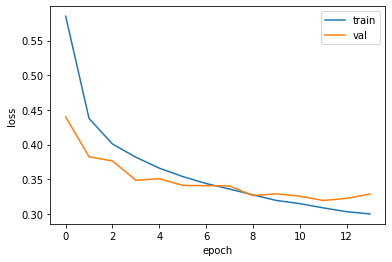

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [78]:
model.evaluate(val_scaled,val_target)

[0.31951450230677925, 0.88116664]